In [20]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

# Dataset Description

The dataset contains information about board games listen on BoardGameGeek.com, an online forum for board game enthusiasts.

### Collection Process

### Dataset Structure

### Variables
GAMES 
>   BGGId			       - BoardGameGeek game ID \
	Name			       - Name of game \
	Description		       - Description, stripped of punctuation and lemmatized \
	YearPublished	       - First year the game was published \
	GameWeight		       - General measure for how difficult/complex a game is, ranges from 1-5 ascending \
	AvgRating		       - Average user rating for game \
	BayesAvgRating	       - Bayes weighted average for game (x # of average reviews applied) \
	StdDev			       - Standard deviation of Bayes Avg \
	MinPlayers		       - Minimum number of players \
	MaxPlayers		       - Maximun number of players \
	ComAgeRec		       - Community's recommended age minimum \
	LanguageEase	       - Language requirement \
	BestPlayers		       - Community voted best player count \
	GoodPlayers		       - List of community voted good player counts \
	NumOwned		       - Number of users who own this game \
	NumWant			       - Number of users who want this game \
	NumWish			       - Number of users who wishlisted this game \
	NumWeightVotes	       - ? Unexplained \
	MfgPlayTime		       - Manufacturer Stated Play Time \
	ComMinPlaytime	       - Community minimum play time \
	ComMaxPlaytime	       - Community maximum play time \
	MfgAgeRec		       - Manufacturer Age Recommendation \
	NumUserRatings	       - Number of user ratings \
	NumComments		       - Number of user comments \
	NumAlternates	       - Number of alternate versions \
    NumExpansions	       - Number of expansions \
	NumImplementations	   - Number of implementations \
	IsReimplementation	   - Binary flag for whether the listing is a reimplementation
	Family			       - Game family \
	Kickstarted		       - Binary flag for whether the game is a kickstarter? \
	ImagePath		       - Image http:// path \
	Rank:boardgame		   - Rank for boardgames overall \
	Rank:strategygames	   - Rank in strategy games \
	Rank:abstracts		   - Rank in abstracts \
	Rank:familygames	   - Rank in family games \
	Rank:thematic		   - Rank in thematic \
	Rank:cgs		       - Rank in card games \
	Rank:wargames		   - Rank in war games \
	Rank:partygames		   - Rank in party games \
	Rank:childrensgames	   - Rank in children's games \
	Cat:Thematic		   - Binary flag for whether game is in Thematic category \
	Cat:Strategy		   - Binary flag for whether game is in Strategy category \
	Cat:War			       - Binary flag for whether game is in War category \
	Cat:Family		       - Binary flag for whether game is in Family category \
	Cat:CGS			       - Binary flag for whether game is in Card Games category \
	Cat:Abstract		   - Binary flag for whether game is in Abstract category \
	Cat:Party		       - Binary flag for whether game is in Party category \
	Cat:Childrens		   - Binary flag for whether game is in Childrens category 

MECHANICS 
>   BGGId			       - BoardGameGeek game ID \
	Remaining headers are various mechanics with binary flag 

THEMES 
>   BGGId			        - BoardGameGeek game ID \
	Remaining headers are various themes with binary flag 

SUBCATEGORIES 
>   BGGId			        - BoardGameGeek game ID \
	Remaining headers are various subcategories with binary flag 

ARTISTS_REDUCED 
>   BGGId			        - BoardGameGeek game ID \
	Low-Exp Artist		    - Indicates game has an unlisted artist with <= 3 entries \
	Remaining headers are various artists with binary flag 

DESIGNERS_REDUCED 
>   BGGId			        - BoardGameGeek game ID \
	Low-Exp Designer	    - Indicates game has an unlisted designer with <= 3 entries \
	Remaining headers are various subcategories with binary flag 

PUBLISHERS_REDUCED 
>   BGGId			        - BoardGameGeek game ID \
	Low-Exp Publisher	    - Indicated games has an unlisted publisher with <= 3 entries \
	Remaining headers are various subcategories with binary flag 

USER_RATINGS 
>   BGGId			        - BoardGameGeek game ID \
	Rating			        - Raw rating given by user \
	Username		        - User giving rating 

RATINGS_DISTRIBUTION 
>   BGGId			        - BoardGameGeek game ID \
	Numbers 0.0-10.0	    - Number of ratings per rating header \
	total_ratings		    - Total number of ratings for game 

# Data Cleaning

### Load Relevant Files of Dataset

In [21]:
load_csv = lambda csv_name: pd.read_csv(f'dataset/{csv_name}.csv')

games = load_csv('games')

Before analyzing the data, we first check for any 'dirtiness' in the relevant columns.

In [22]:
# check types 
print(f"GameWeight datatype: {games['GameWeight'].dtype}")
print(f"AvgRating datatype: {games['AvgRating'].dtype}\n")

# check range of values
print(f"GameWeight Range of Values: [{games['GameWeight'].min()}, {games['GameWeight'].max()}]")
print(f"AvgRating Range of Values: [{games['AvgRating'].min()}, {games['AvgRating'].max()}]\n")

# check for missing values
print(f"GameWeight has missing values: {games['GameWeight'].isna().any()}")
print(f"AvgRating has missing values: {games['AvgRating'].isna().any()}\n")

# check for duplicates in games dataframe
print(f"Games has duplicate rows: {games.duplicated().any()}")

GameWeight datatype: float64
AvgRating datatype: float64

GameWeight Range of Values: [0.0, 5.0]
AvgRating Range of Values: [1.04133, 9.91429]

GameWeight has missing values: False
AvgRating has missing values: False

Games has duplicate rows: False


GameWeight and  do not need to be cleaned. Neither has any missing values, the table as a whole has no duplicates, the data types are appropriate, and the ranges of values are within the actual allowable values that BoardGameGeek uses ([0, 5] and [0, 10]), suggesting no default values are used to mark missing data.

# Exploratory Data Analysis

### Is there a relationship between the difficulty of a game and its average rating?

In the games dataframe, the GameWeight and AvgRating variables correspond to game difficulty and the average rating, respectively. Now we can use a scatterplot to visualize the relationship between these two variables.

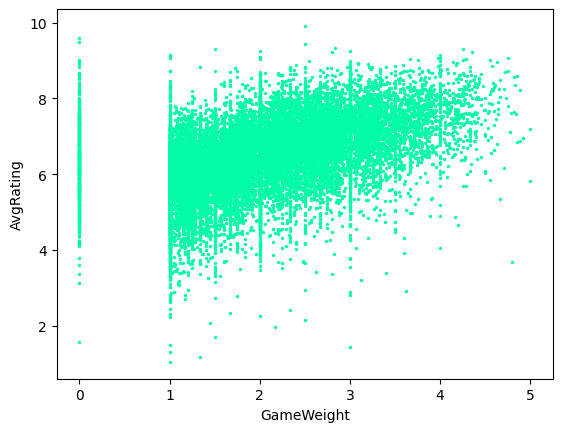

In [23]:
plt.scatter(games['GameWeight'], games['AvgRating'], color="#03fca5", s=2)
plt.xlabel('GameWeight')
plt.ylabel('AvgRating')
plt.show()

Visually, it seems as though there is some positive relationship between the two, however is not completely clear. To be more sure, we can measure the correlation between the two, and perform a statistical test to determine whether the relationship is significant. 

We can use a historgram to visualize their distributions.

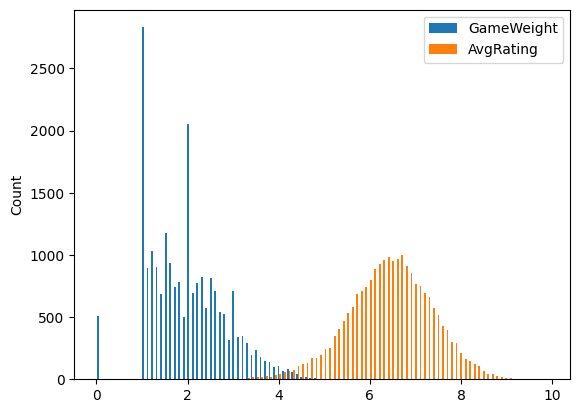

In [24]:
plt.hist([games['GameWeight'], games['AvgRating']], bins=100)
plt.legend(['GameWeight', 'AvgRating'])
plt.ylabel('Count')
plt.show()

While the average ratings are clearly normally distributed, it is not clear whether game difficulty is. Since Pearson correlation test requires that both variables be normally distributed, we use the Spearman correlation test instead. An added benefit is that Spearman correlation is also more resistant to outliers.  

$H_0$ - There is no relationship between game difficulty and average rating. \
$H_A$ - There is a relationship between game difficulty and average rating.

In [25]:
result = sp.spearmanr(games['GameWeight'], games['AvgRating'])
print(f'Statistic: {result.statistic}, p-value: {result.pvalue}')

Statistic: 0.50493306689286, p-value: 0.0


The p-value may have been a small enough number that scipy decided to round it down to 0. Regardless, at 0.05 significance level, there is strong evidence that a board games's difficulty is related to its average rating. 

### possible EDA questions: different correlations between numerical variables like game difficulty, avg rating, age, popularity (extracted from variables like, NumOwned, NumWant, etc.), number of players, playtime, etc.